In [ ]:
import os
__file__

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = './configs/My_config/vfnet_x101_64x4d_fpn_ver2.py'
# Setup a checkpoint file to load
checkpoint = 'vfnet_x101_64x4d_fpn.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

In [ ]:
colors =[
        (129, 236, 236),
        (2, 132, 227),
        (232, 67, 147),
        (253, 234, 255),
        (0, 184, 148),
        (85, 239, 196),
        (48, 51, 107),
        (253, 159, 26),
        (253, 204, 204),
        (179, 57, 57),
        (248, 243, 212),
    ]

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from albumentations import Resize
import numpy as np
Re=Resize(512,512)
pil_image = Image.open("./test_img/trash.jpg")
img=pil_image.transpose(Image.ROTATE_270)
image = np.array(img)

In [ ]:
image.shape

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

In [ ]:
img=Re(image=image)

In [ ]:
plt.imshow(img['image'])

In [25]:
save_img=Image.fromarray(img['image'])

In [30]:
import os
os.getcwd()

'/opt/ml/detect/mmdetection_trash'

In [27]:
save_img.save('dd.jpg')

In [ ]:
img['image'].shape

In [51]:
import cv2
from albumentations import Resize
Re=Resize(512,512)
img = cv2.imread("./test_img/trash3.jpg")
#img = cv2.imread("/opt/ml/pstage3/input/data/batch_02_vt/0200.jpg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img=Re(image=img)

(4032, 3024, 3)


In [59]:
result = inference_detector(model, img['image'])

In [61]:
tmp=model.show_result(img['image'],result,score_thr=0.6,bbox_color=colors,text_color='white',
                  show=False,thickness=3)

In [62]:
save_img=Image.fromarray(tmp)
save_img.save('dd.jpg')

In [5]:
# Use the detector to do inference
#img = '/opt/ml/pstage3/input/data/batch_01_vt/0033.jpg'
#img = './test_img/trash.jpg'
result = inference_detector(model, img['image'])

/opt/ml/detect/mmdetection_trash/mmdet/datasets/utils.py:64: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


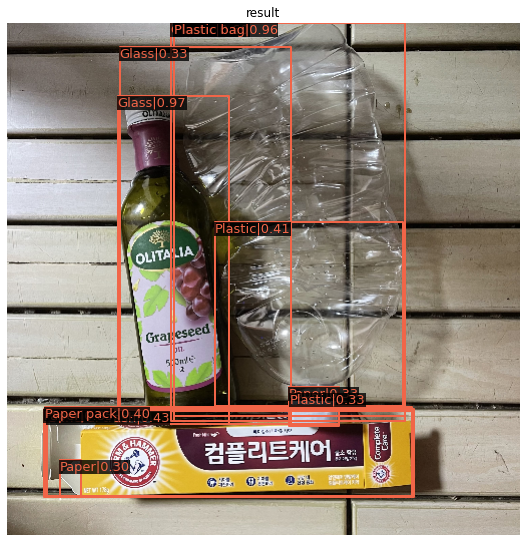

In [95]:
# Let's plot the result
show_result_pyplot(model, img['image'], result, score_thr=0.3)

In [13]:
f=open("./test_img/trash3.jpg")